# Plotting

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [15]:
# Some of the basic variables the program needs

# Setting the figure size of the plots
plt.rcParams['figure.figsize'] = (10,6)

3050
3550


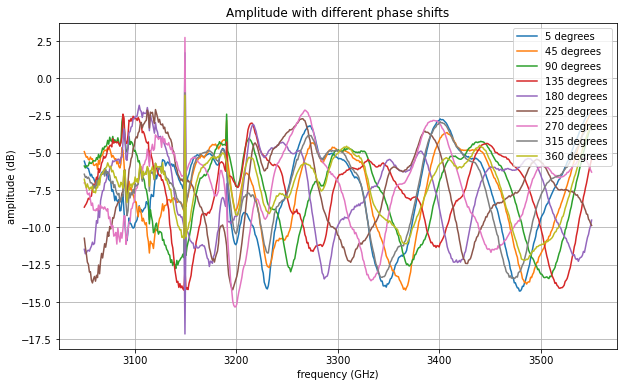

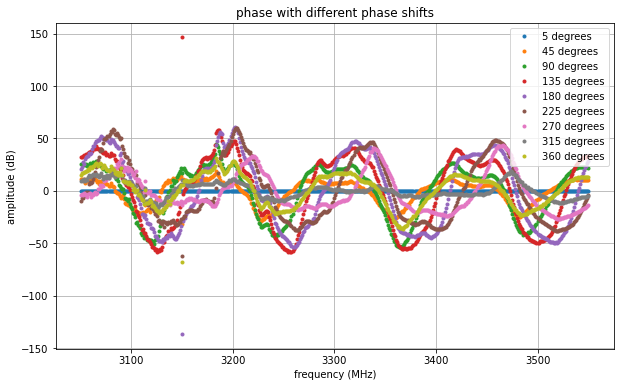

In [19]:
# Plotting the measurements

def opening_files(name, start, end, steps, phase_shift):
    s21 = np.zeros((int((end-start)/(1000/steps)), len(phase_shift)), dtype=np.complex)
    st = int(start//(1000/steps))
    en = int(end//(1000/steps))
    print(st)
    print(en)
    for deg in phase_shift:
        file_name = "{}_{}-{}GHz_{}_steps_phase_shift_{}_degrees.dat".format(name, 0, 6, steps, deg)
        save_name = os.path.join("Measurements", file_name)
        s21_open = np.loadtxt(save_name)
        s21[:, phase_shift.index(deg)] = s21_open[st:en, 0] + s21_open[st:en, 1] * 1j
    cal_s21 = calibrating_measurement(s21, st, en, steps)
    return cal_s21
    
def calibrating_measurement(s21, start, end, steps):
    file_name = "trans_open_{}-{}GHz_{}_steps.dat".format(0, 6, steps)
    save_name = os.path.join("Calibration", file_name)
    trans_open = np.loadtxt(save_name)
    t_open = trans_open[start:end, 0] + trans_open[start:end, 1] * 1j

    file_name = "trans_through_{}-{}GHz_{}_steps.dat".format(0, 6, steps)
    save_name = os.path.join("Calibration", file_name)
    trans_through = np.loadtxt(save_name)
    t_through = trans_through[start:end, 0] + trans_through[start:end, 1] * 1j

    cal_s21 = np.zeros(np.shape(s21), dtype=np.complex128)
    x, y = np.shape(s21)
    for i in range(y):
        cal_s21[:, i] = (s21[:, i] - t_open) / (t_through - t_open)
    return cal_s21

def get_labels(phase_shift):
    labels = []
    for deg in phase_shift:
        labels.append("{} degrees".format(deg))
    return labels

def plot_amplitude(s21, start, end, steps, labels):
    freq = np.linspace(start + (end - start)/steps, end, int((end-start)/(1000/steps)))
    f = np.zeros(np.shape(s21))
    f = f + freq[:, None]
    amp_s21 = np.sqrt(s21.real**2 + s21.imag**2)
    amp_s21 = 20*np.log10(amp_s21)
    plt.figure(20)
    plt.plot(f, amp_s21, "-")
    plt.xlabel("frequency (GHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels)
    plt.grid()
    plt.title("Amplitude with different phase shifts")
    
def plot_phase(s21, start, end, steps, labels):
    freq = np.linspace(start + (end - start)/steps, end, int((end-start)/(1000/steps)))
    f = np.zeros(np.shape(s21))
    f = f + freq[:, None]
    phase = np.arctan2(s21.imag, s21.real)
    phase -= phase[:, 0, None]
    phase = phase * 180/np.pi
    phase[phase< -180] += 360
    phase[phase > 180] -= 360
    plt.figure(10)
    plt.plot(f, phase, ".")
    plt.xlabel("frequency (MHz)")
    plt.ylabel("amplitude (dB)")
    plt.legend(labels)
    plt.grid()
    plt.title("phase with different phase shifts")
    
# Opening the measurement data file
# name = "through_with_phase_shifter"
name = "michelson_interferometer_1_phase_shifter"

# Start and end in MHz
start = 3050
end = 3550
steps = 1000
phase_shift = [5, 45, 90, 135, 180, 225, 270, 315, 360]

# ---------------Opening Measurement Files---------------
s21 = opening_files(name, start, end, steps, phase_shift)

# ---------------Calibrating Measurement Files---------------
#s21 = calibrating_measurement(s21, start, end, steps)

# ---------------Plotting Amplitude---------------
# Making labels
labels = get_labels(phase_shift)

plot_amplitude(s21, start, end, steps, labels)

# ---------------Plotting Phase-----------------
plot_phase(s21, start, end, steps, labels)